<h1 style="color:rgba(37, 214, 191, 1);">IMPORTS</h1>

In [210]:
# Todos los imports necesitados en todo el notebook (No hay imports en otras celdas)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import MaxNLocator

<h1 style="color:rgba(187, 32, 187, 1);">OBSERVACIONES DEL DF</h2>

In [211]:
# Cargamos el dataset "de prueba" en nuestro dataframe df para hacer una rapida visualización de los datos
df_aux = pd.read_csv("Hogwards - 20241T.csv")

# Mostramos los primeros datos del df
df_aux.head(15)

,ID,Name,Descriptive Name,Description,Domain,Owner,IsCompliance,Status,Version,NumberUsers
0,DP001,ProfeciaMonitor,Monitor de Pociones,"Data Product relacionado con adivinacion, util...",Adivinacion,Sybill Trelawney,True,Production,1.4.0,46
1,DP002,CriaturaWatch,Sistema de Seguimiento de Hechizos,"Data Product relacionado con pociones, utiliza...",Pociones,Severus Snape,True,Production,2.6.9,100
2,DP003,EstelarMap,Aplicacion de Transfiguraciones,"Data Product relacionado con pociones, utiliza...",Pociones,Severus Snape,False,Deprecated,0.4.1,38
3,DP004,Transfigurator,Monitor de Pociones,"Data Product relacionado con transformaciones,...",Transformaciones,Minerva McGonagall,False,Development,2.9.6,99
4,DP005,CriaturaWatch,Vigilante de Criaturas Magicas,"Data Product relacionado con transformaciones,...",Transformaciones,Minerva McGonagall,True,Production,2.3.7,51
5,DP006,EstelarMap,Guardian de la Historia,"Data Product relacionado con herbologia, utili...",Herbologia,Pomona Sprout,False,Planned,2.0.8,72
6,DP007,TrackHechizo,Mapa Estelar,"Data Product relacionado con transformaciones,...",Transformaciones,Minerva McGonagall,False,Deprecated,2.9.2,100
7,DP008,ProfeciaMonitor,Mapa Estelar,Data Product relacionado con historia de la ma...,Historia de la Magia,Cuthbert Binns,True,Development,0.0.1,33
8,DP009,HerboApp,Mapa Estelar,Data Product relacionado con cuidado de criatu...,Cuidado de Criaturas Magicas,Rubeus Hagrid,False,Production,2.3.7,74
9,DP010,Transfigurator,Aplicacion de Transfiguraciones,"Data Product relacionado con pociones, utiliza...",Pociones,Severus Snape,False,Deprecated,0.6.2,43


In [212]:
# Como nos piden analisis generales y analisis trimetrales, vamos a crear varios dataframes
df_T1 = pd.read_csv("Hogwards - 20241T.csv")  # Trimestre 1
df_T2 = pd.read_csv("Hogwards - 20242T.csv")  # Trimestre 2
df_T3 = pd.read_csv("Hogwards - 20243T.csv")  # Trimestre 3
df_Anual = pd.concat([df_T1, df_T2, df_T3], ignore_index=True)  # Anual (los tres trimestres juntos)

# Ahora vamos a modificar el ID del df_Anual para que vaya de DP001 a DPxxx, ya que al concatenar los dataframes, los IDs se repiten.
# Generamos los nuevos valores de 'ID' comenzando desde 'DP001'
df_Anual['ID'] = ['DP' + str(i).zfill(3) for i in range(1, len(df_Anual) + 1)]

# Mostramos el df Anual
df_Anual

,ID,Name,Descriptive Name,Description,Domain,Owner,IsCompliance,Status,Version,NumberUsers
0,DP001,ProfeciaMonitor,Monitor de Pociones,"Data Product relacionado con adivinacion, util...",Adivinacion,Sybill Trelawney,True,Production,1.4.0,46
1,DP002,CriaturaWatch,Sistema de Seguimiento de Hechizos,"Data Product relacionado con pociones, utiliza...",Pociones,Severus Snape,True,Production,2.6.9,100
2,DP003,EstelarMap,Aplicacion de Transfiguraciones,"Data Product relacionado con pociones, utiliza...",Pociones,Severus Snape,False,Deprecated,0.4.1,38
3,DP004,Transfigurator,Monitor de Pociones,"Data Product relacionado con transformaciones,...",Transformaciones,Minerva McGonagall,False,Development,2.9.6,99
4,DP005,CriaturaWatch,Vigilante de Criaturas Magicas,"Data Product relacionado con transformaciones,...",Transformaciones,Minerva McGonagall,True,Production,2.3.7,51
...,...,...,...,...,...,...,...,...,...,...
202,DP203,ProfeciaMonitor,Registro de Encantamientos,Data Product relacionado con historia de la ma...,Historia de la Magia,Cuthbert Binns,False,Development,0.1.9,44
203,DP204,Transfigurator,Monitor de Profecias,"Data Product relacionado con encantamientos, u...",Encantamientos,Filius Flitwick,False,Development,0.4.0,100
204,DP205,CharmLog,Monitor de Pociones,Data Product relacionado con defensa contra la...,Defensa Contra las Artes Oscuras,Remus Lupin,True,Development,0.3.4,45
205,DP206,HerboApp,Guardian de la Historia,"Data Product relacionado con pociones, utiliza...",Pociones,Severus Snape,False,Deprecated,0.6.5,100


#### Vamos a ir guardando valores que necesitemos a futuro para las graficas en variables.

In [213]:
# Como nos piden la cantidad de data products en base al dominio y estado, vamos a obtener esos valores
data_products_count = df_Anual.groupby(['Domain', 'Status']).size().unstack(fill_value=0)
data_products_count

Status,Deprecated,Development,Planned,Production
Domain,,,,
Adivinacion,3,9,3,17
Astronomia,1,2,9,5
Cuidado de Criaturas Magicas,3,0,5,8
Defensa Contra las Artes Oscuras,2,4,8,3
Encantamientos,8,5,0,6
Herbologia,9,0,15,2
Historia de la Magia,7,12,5,3
Pociones,7,6,3,13
Transformaciones,10,6,3,5


### Análisis trimestral de los Data Products en estado "Planned" o "Production":

¿Cuántos de estos cumplen con las normas de compliance?


In [214]:
# Vamos a sacar de cada trimestre, los data products, con estado "Planned" y "Production", que cumplen con el compliance (compliance = True)
compT_PP_T1 = df_T1[(df_T1['Status'].isin(['Planned', 'Production'])) & (df_T1['IsCompliance'] == True)] # Compliance True, Planned y Production
compT_PP_T2 = df_T2[(df_T2['Status'].isin(['Planned', 'Production'])) & (df_T2['IsCompliance'] == True)]
compT_PP_T3 = df_T3[(df_T3['Status'].isin(['Planned', 'Production'])) & (df_T3['IsCompliance'] == True)]

¿Cuántos usuarios están utilizando estos Data Products en cada área?

In [215]:
# Una vez tenemos los dataframes de cada trimestre, vamos a obtener la cantidad de usuarios (NumberUsers) por cada dominio (Domain) de cada trimestre
UPD_T_T1 = compT_PP_T1.groupby('Domain')['NumberUsers'].sum()   # Usuarios Por Dominio True
UPD_T_T2 = compT_PP_T2.groupby('Domain')['NumberUsers'].sum()
UPD_T_T3 = compT_PP_T3.groupby('Domain')['NumberUsers'].sum()

¿Cuál es el promedio de usuarios por área?

In [216]:
# A continuación vamos a calcular el promedio de usuarios por cada dominio de cada trimestre
avg_UPD_T1 = compT_PP_T1.groupby('Domain')['NumberUsers'].mean().round(3)   # Average Usuarios Por Dominio
avg_UPD_T2 = compT_PP_T2.groupby('Domain')['NumberUsers'].mean().round(3)
avg_UPD_T3 = compT_PP_T3.groupby('Domain')['NumberUsers'].mean().round(3)

Y en aquellos que no cumplen con compliance, ¿cuántos usuarios tienen de todas formas? (¡Esto es importante para identificar posibles brechas de seguridad!).

In [217]:
# Finalmente hacemos lo mismo para los que no cumplen con el compliance (compliance = False)
compF_PP_T1 = df_T1[(df_T1['Status'].isin(['Planned', 'Production'])) & (df_T1['IsCompliance'] == False)]    # Compliance False, Planned y Production
compF_PP_T2 = df_T2[(df_T2['Status'].isin(['Planned', 'Production'])) & (df_T2['IsCompliance'] == False)]
compF_PP_T3 = df_T3[(df_T3['Status'].isin(['Planned', 'Production'])) & (df_T3['IsCompliance'] == False)]

# Y sacamos los usuarios por dominio
UPD_F_T1 = compF_PP_T1.groupby('Domain')['NumberUsers'].sum()   # Usuarios Por Dominio False
UPD_F_T2 = compF_PP_T2.groupby('Domain')['NumberUsers'].sum()
UPD_F_T3 = compF_PP_T3.groupby('Domain')['NumberUsers'].sum()

In [218]:
# Vamos a visualizar los datos obtenidos anteriormente de manera sencilla para ver que hemos extraido (haré el print de solo uno de los 3)
print("=============================================")
print("== Data Products con Planned y Predictions ==")
print("=============================================")
print("Data Products (Compliance = True)")
print(compT_PP_T1)
print("--------------------------------------------------------------")
print("Numero de usuarios por dominio (Total) (Compliance = True)")
print(UPD_T_T2)
print("--------------------------------------------------------------")
print("Numero de usuarios por dominio (Average) (Compliance = True)")
print(avg_UPD_T3)
print("--------------------------------------------------------------")
print("Data Products (Compliance = False)")
print(compF_PP_T1)
print("--------------------------------------------------------------")
print("Numero de usuarios por dominio (Total) (Compliance = False)")
print(UPD_F_T2)

# Para que todo se vea bien se tiene que ver como un "scrollable" en el notebook

== Data Products con Planned y Predictions ==
Data Products (Compliance = True)
       ID             Name                    Descriptive Name  \
0   DP001  ProfeciaMonitor                 Monitor de Pociones   
1   DP002    CriaturaWatch  Sistema de Seguimiento de Hechizos   
4   DP005    CriaturaWatch      Vigilante de Criaturas Magicas   
10  DP011   Transfigurator                Monitor de Profecias   
14  DP015  ProfeciaMonitor                 Monitor de Pociones   
20  DP021       EstelarMap                 Monitor de Pociones   
25  DP026    CriaturaWatch            Aplicacion de Herbologia   
33  DP034         HerboApp                Monitor de Profecias   
34  DP035     TrackHechizo          Registro de Encantamientos   
35  DP036     TrackHechizo             Guardian de la Historia   
38  DP039   Transfigurator  Sistema de Seguimiento de Hechizos   
39  DP040    CriaturaWatch      Vigilante de Criaturas Magicas   
47  DP048       PocionSafe                        Mapa Estelar

### Análisis trimestral de los Data Products "Deprecated":

¿Cuántos Data Products en estado "Deprecated" hay en cada dominio?

In [219]:
# Vamos a sacar de cada trimestre, los data products, con estado "Deprecated" para cada dominio
DPD_T1 = df_T1[df_T1['Status'] == 'Deprecated'].groupby('Domain').size()  # Deprecated Por Dominio
DPD_T2 = df_T2[df_T2['Status'] == 'Deprecated'].groupby('Domain').size()
DPD_T3 = df_T3[df_T3['Status'] == 'Deprecated'].groupby('Domain').size()

¿Cuántos usuarios siguen conectados a estos Data Products que, oficialmente, ya no están en servicio?


In [220]:
# Para acabar sacamos la cantidad de usuarios que usan data products "Deprecated" por cada dominio
UPDD_T1 = df_T1[df_T1['Status'] == 'Deprecated'].groupby('Domain')['NumberUsers'].sum()   # Usuarios Por Dominio Deprecated
UPDD_T2 = df_T2[df_T2['Status'] == 'Deprecated'].groupby('Domain')['NumberUsers'].sum()
UPDD_T3 = df_T3[df_T3['Status'] == 'Deprecated'].groupby('Domain')['NumberUsers'].sum()

In [221]:
# Vamos a visualizar los datos obtenidos anteriormente de manera sencilla para ver que hemos extraido (haré el print de solo uno de los 3)
print("==================================")
print("== Data Products con Deprecated ==")
print("==================================")
print("Data Products por dominio (Deprecated)")
print(DPD_T1)
print("-----------------------------------------------------------")
print("Numero de usuarios por dominio (Total) (Deprecated)")
print(UPDD_T2)

== Data Products con Deprecated ==
Data Products por dominio (Deprecated)
Domain
Adivinacion             1
Encantamientos          2
Herbologia              3
Historia de la Magia    2
Pociones                2
Transformaciones        2
dtype: int64
-----------------------------------------------------------
Numero de usuarios por dominio (Total) (Deprecated)
Domain
Adivinacion                          52
Cuidado de Criaturas Magicas         55
Defensa Contra las Artes Oscuras     41
Encantamientos                      139
Herbologia                          170
Historia de la Magia                 97
Pociones                             81
Transformaciones                    324
Name: NumberUsers, dtype: int64


### Análisis de los funcionarios (Owners) por cada trimestre:

¿Cuántos funcionarios están trabajando, y cuántos Data Products (por estado) tienen asignados?

In [222]:
# Vamos a ver los funcionarios (Owners) que hay en cada trimestre
fun_T1 = df_T1["Owner"].unique()
fun_T2 = df_T2["Owner"].unique()
fun_T3 = df_T3["Owner"].unique()

# A continuación vamos a ver cuantos data products tiene cada funcionario por estado en cada trimestre
DPOE_T1 = df_T1.groupby(["Owner", "Status"]).size()  # Data Products por Owner y Estado
DPOE_T2 = df_T2.groupby(["Owner", "Status"]).size()
DPOE_T3 = df_T3.groupby(["Owner", "Status"]).size()

En cada dominio, ¿quiénes son los tres Owners con más usuarios en sus Data Products en estado "Planned" o "Production"?

In [223]:
# Sacamos por cada dominio, los tres funcionarios (Owners) con mas usuarios (NumberUsers) en sus Data Products con estado (Status) "Planned" o "Production"
top_own_PPD_T1 = df_T1[df_T1['Status'].isin(['Planned', 'Production'])].groupby(['Domain', 'Owner'])['NumberUsers'].sum().reset_index() # Top Owners con Planned y Production por Dominio
top_own_PPD_T1 = top_own_PPD_T1.sort_values(['Domain', 'NumberUsers'], ascending=[True, False]).groupby('Domain').head(3)   # Nos quedamos con los 3 primeros por Dominio
top_own_PPD_T2 = df_T2[df_T2['Status'].isin(['Planned', 'Production'])].groupby(['Domain', 'Owner'])['NumberUsers'].sum().reset_index()
top_own_PPD_T2 = top_own_PPD_T2.sort_values(['Domain', 'NumberUsers'], ascending=[True, False]).groupby('Domain').head(3)
top_own_PPD_T3 = df_T3[df_T3['Status'].isin(['Planned', 'Production'])].groupby(['Domain', 'Owner'])['NumberUsers'].sum().reset_index()
top_own_PPD_T3 = top_own_PPD_T3.sort_values(['Domain', 'NumberUsers'], ascending=[True, False]).groupby('Domain').head(3)

Por otro lado, ¿quién es el Owner menos productivo en cada dominio? Esto significa que tiene el mayor porcentaje de Data Products en estado "Deprecated" sobre el total que le han asignado. Si hay empate, ¡queremos saber todos los nombres!


In [224]:
# Por el contrario, sacamos por cada dominio, el funcionario (Owners) menos prodcutivo (más procentaje de data products "Deprecated") (si hay empate, se muestran todos los empatados)
# Primero vamos a sacar la cantidad total de data products por owner
total_dp_T1 = df_T1.groupby('Owner').size().reset_index(name='TotalCount') # Total de Data Products por Owner
total_dp_T2 = df_T2.groupby('Owner').size().reset_index(name='TotalCount')
total_dp_T3 = df_T3.groupby('Owner').size().reset_index(name='TotalCount')

# Luego sacamos la cantidad de data products "Deprecated" por owner y dominio
bottom_own_DPD_T1 = df_T1[df_T1['Status'] == 'Deprecated'].groupby(['Domain', 'Owner']).size().reset_index(name='DeprecatedCount')  # Bottom Owners con Deprecated por Dominio
bottom_own_DPD_T2 = df_T2[df_T2['Status'] == 'Deprecated'].groupby(['Domain', 'Owner']).size().reset_index(name='DeprecatedCount')
bottom_own_DPD_T3 = df_T3[df_T3['Status'] == 'Deprecated'].groupby(['Domain', 'Owner']).size().reset_index(name='DeprecatedCount')

# Ahora unimos los dataframes para calcular el porcentaje de data products "Deprecated" por owner y dominio
bottom_own_DPD_T1 = bottom_own_DPD_T1.merge(total_dp_T1, on='Owner')    # Unimos con el total de data products por owner
bottom_own_DPD_T1['DeprecatedPercentage'] = (bottom_own_DPD_T1['DeprecatedCount'] / bottom_own_DPD_T1['TotalCount']) * 100  # Calculamos el porcentaje
bottom_own_DPD_T2 = bottom_own_DPD_T2.merge(total_dp_T2, on='Owner')
bottom_own_DPD_T2['DeprecatedPercentage'] = (bottom_own_DPD_T2['DeprecatedCount'] / bottom_own_DPD_T2['TotalCount']) * 100
bottom_own_DPD_T3 = bottom_own_DPD_T3.merge(total_dp_T3, on='Owner')
bottom_own_DPD_T3['DeprecatedPercentage'] = (bottom_own_DPD_T3['DeprecatedCount'] / bottom_own_DPD_T3['TotalCount']) * 100

# Ahora sacamos el owner con mayor porcentaje de data products "Deprecated" por dominio
bottom_own_DPD_T1 = bottom_own_DPD_T1.sort_values(['Domain', 'DeprecatedPercentage'], ascending=[True, False]).groupby('Domain').head(1)    # Sacamos el mayor porcentaje por dominio
bottom_own_DPD_T2 = bottom_own_DPD_T2.sort_values(['Domain', 'DeprecatedPercentage'], ascending=[True, False]).groupby('Domain').head(1)
bottom_own_DPD_T3 = bottom_own_DPD_T3.sort_values(['Domain', 'DeprecatedPercentage'], ascending=[True, False]).groupby('Domain').head(1)

# Finalmente, si hay empate, mostramos todos los empatados
max_percentages_T1 = bottom_own_DPD_T1.groupby('Domain')['DeprecatedPercentage'].max().reset_index()    # Sacamos el maximo porcentaje por dominio
bottom_own_DPD_T1 = bottom_own_DPD_T1.merge(max_percentages_T1, on=['Domain', 'DeprecatedPercentage'])  # Unimos para quedarnos con los empatados
max_percentages_T2 = bottom_own_DPD_T2.groupby('Domain')['DeprecatedPercentage'].max().reset_index()
bottom_own_DPD_T2 = bottom_own_DPD_T2.merge(max_percentages_T2, on=['Domain', 'DeprecatedPercentage'])
max_percentages_T3 = bottom_own_DPD_T3.groupby('Domain')['DeprecatedPercentage'].max().reset_index()
bottom_own_DPD_T3 = bottom_own_DPD_T3.merge(max_percentages_T3, on=['Domain', 'DeprecatedPercentage'])

Y finalmente, debido a la importancia de la ubicuidad, ¿hay algún funcionario que esté trabajando en varios dominios a la vez? El Ministerio quiere saber si tiene a algún mago "polifacético" en su equipo.

In [225]:
# Vamos a ver si hay algun owner que esté en varios dominios a la vez
Dif_DMO_T1 = df_T1.groupby('Owner')['Domain'].agg(DomainsCount='nunique', Domains='unique').reset_index()  # Diferentes Dominios Mismo Owners
Dif_DMO_T2 = df_T2.groupby('Owner')['Domain'].agg(DomainsCount='nunique', Domains='unique').reset_index()
Dif_DMO_T3 = df_T3.groupby('Owner')['Domain'].agg(DomainsCount='nunique', Domains='unique').reset_index()

# Vamos a renombrar las columnas para mayor claridad
Dif_DMO_T1.columns = ['Owner', 'DomainsCount', 'Domains']
Dif_DMO_T2.columns = ['Owner', 'DomainsCount', 'Domains']
Dif_DMO_T3.columns = ['Owner', 'DomainsCount', 'Domains']

# Filtramos los owners que tienen más de un dominio
multi_domain_owners_T1 = Dif_DMO_T1[Dif_DMO_T1['DomainsCount'] > 1]
multi_domain_owners_T2 = Dif_DMO_T2[Dif_DMO_T2['DomainsCount'] > 1]
multi_domain_owners_T3 = Dif_DMO_T3[Dif_DMO_T3['DomainsCount'] > 1]

<h1 style="color:rgba(25, 142, 219, 1);">MUESTREO DE DATOS</h2>

<h3 style="color:rgba(32, 47, 187, 1);">Cantidad de Data Products ANUAL por Dominio y Estado</h3>

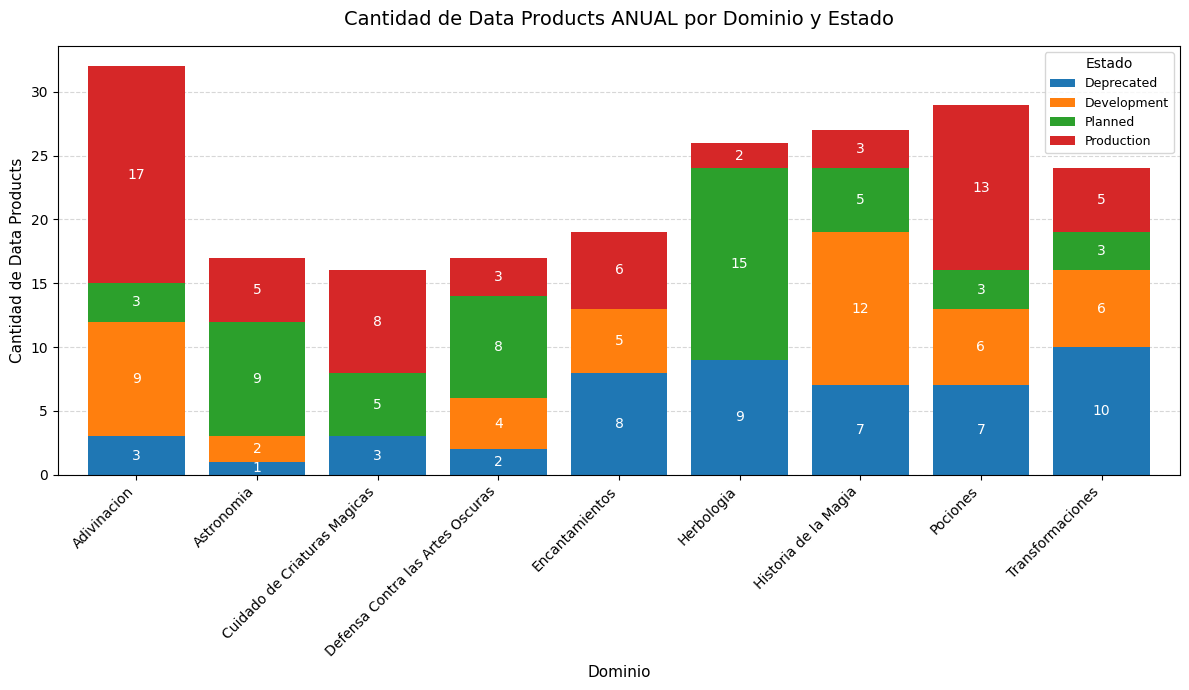

In [226]:
# Configuración del estilo de los gráficos
ax = data_products_count.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 7),
    width=0.8
)

# Títulos y etiquetas
ax.set_title('Cantidad de Data Products ANUAL por Dominio y Estado', fontsize=14, pad=15)
ax.set_xlabel('Dominio', fontsize=11)
ax.set_ylabel('Cantidad de Data Products', fontsize=11)

# Rotación y alineación de etiquetas del eje X
plt.xticks(rotation=45, ha='right')

# Leyenda
ax.legend(
    title='Estado',
    title_fontsize=10,
    fontsize=9,
    loc='upper right'   # Ubicación de la leyenda que sino se sobrepone con las barras
)

# Cuadrícula suave en eje Y
ax.yaxis.grid(True, linestyle='--', alpha=0.5)
ax.set_axisbelow(True)

# Agregar los valores dentro de las barras apiladas
for p in ax.patches:
    # Obtener el valor de cada barra
    height = p.get_height()
    # Si la altura de la barra es mayor que 0 (para evitar barras vacías)
    if height > 0:
        # Colocar el texto en el centro de la barra
        ax.annotate(
            f'{height:.0f}',  # El valor de la barra
            (p.get_x() + p.get_width() / 2., p.get_y() + height / 2.),  # Coordenadas dentro de la barra
            ha='center', va='center',  # Alineación horizontal y vertical al centro
            fontsize=10, color='white',  # Tamaño y color del texto (usamos blanco para que resalte dentro de la barra)
        )

# Ajuste de márgenes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

<h3 style="color:rgba(45, 187, 32, 1);">Data Products que cumplen Compliance por Trimestre</h3>

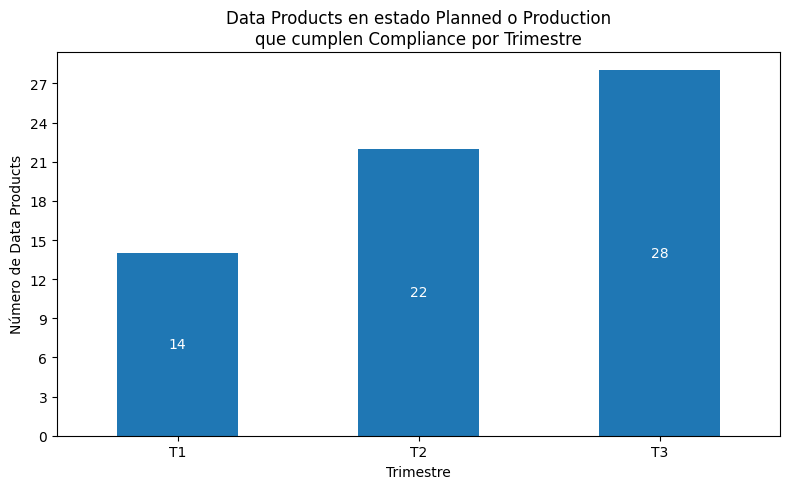

In [227]:
# Calculamos cuántos Data Products cumplen compliance en Planned o Production por trimestre
compliance_counts = {
    'T1': len(compT_PP_T1),
    'T2': len(compT_PP_T2),
    'T3': len(compT_PP_T3)
}

# Convertimos a DataFrame para facilitar la visualización
df_compliance_counts = pd.DataFrame.from_dict(
    compliance_counts, 
    orient='index', 
    columns=['Número de Data Products']
)

# Creamos la gráfica
plt.figure(figsize=(8, 5))
ax = df_compliance_counts.plot(
    kind='bar',
    legend=False,
    ax=plt.gca()
)

# Ajustes visuales
ax.set_title(
    'Data Products en estado Planned o Production\nque cumplen Compliance por Trimestre',
    fontsize=12
)
ax.set_xlabel('Trimestre')
ax.set_ylabel('Número de Data Products')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks(rotation=0)

# Agregar los valores dentro de las barras
for p in ax.patches:
    height = p.get_height()  # Obtener la altura de la barra
    if height > 0:  # Solo agregar texto si la barra tiene altura
        ax.annotate(
            f'{height:.0f}',  # El valor de la barra
            (p.get_x() + p.get_width() / 2., p.get_y() + height / 2.),  # Coordenadas dentro de la barra
            ha='center', va='center',  # Alineación horizontal y vertical al centro
            fontsize=10, color='white',  # Tamaño y color del texto
        )

plt.tight_layout()
plt.show()

<h3 style="color:rgba(45, 187, 32, 1);">Número de usuarios por dominio para Data Products con Compliance</h3>

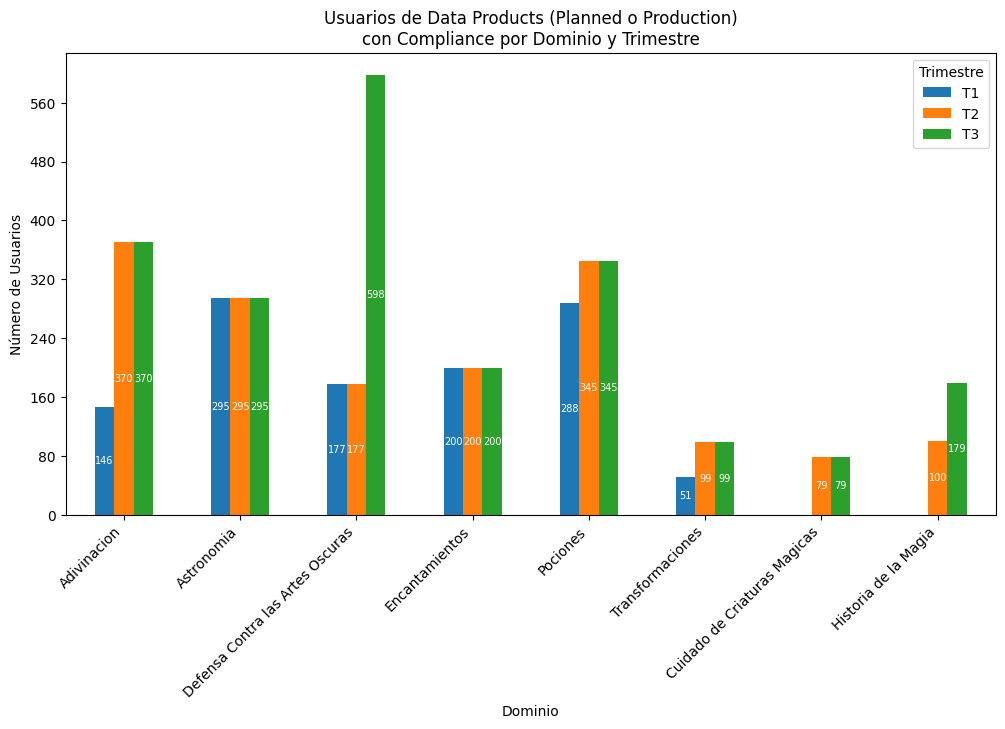

In [228]:
# Unificamos los datos de usuarios por dominio y trimestre en un DataFrame
df_users_domains = pd.concat(
    [
        UPD_T_T1.rename('T1'),
        UPD_T_T2.rename('T2'),
        UPD_T_T3.rename('T3')
    ],
    axis=1
).fillna(0)

# Creamos la gráfica de barras agrupadas
plt.figure(figsize=(12, 6))
ax = df_users_domains.plot(
    kind='bar',
    ax=plt.gca()
)

# Títulos y etiquetas
ax.set_title(
    'Usuarios de Data Products (Planned o Production)\ncon Compliance por Dominio y Trimestre',
    fontsize=12
)
ax.set_xlabel('Dominio')
ax.set_ylabel('Número de Usuarios')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks(rotation=45, ha='right')

# Añadimos los valores dentro de cada barra
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(
            f'{int(height)}',
            (p.get_x() + p.get_width() / 2., p.get_y() + height / 2.),
            ha='center',
            va='center',
            fontsize=7,
            color='white'
        )

plt.legend(title='Trimestre')
plt.show()

<h3 style="color:rgba(45, 187, 32, 1);">Promedio de usuarios por dominio</h3>

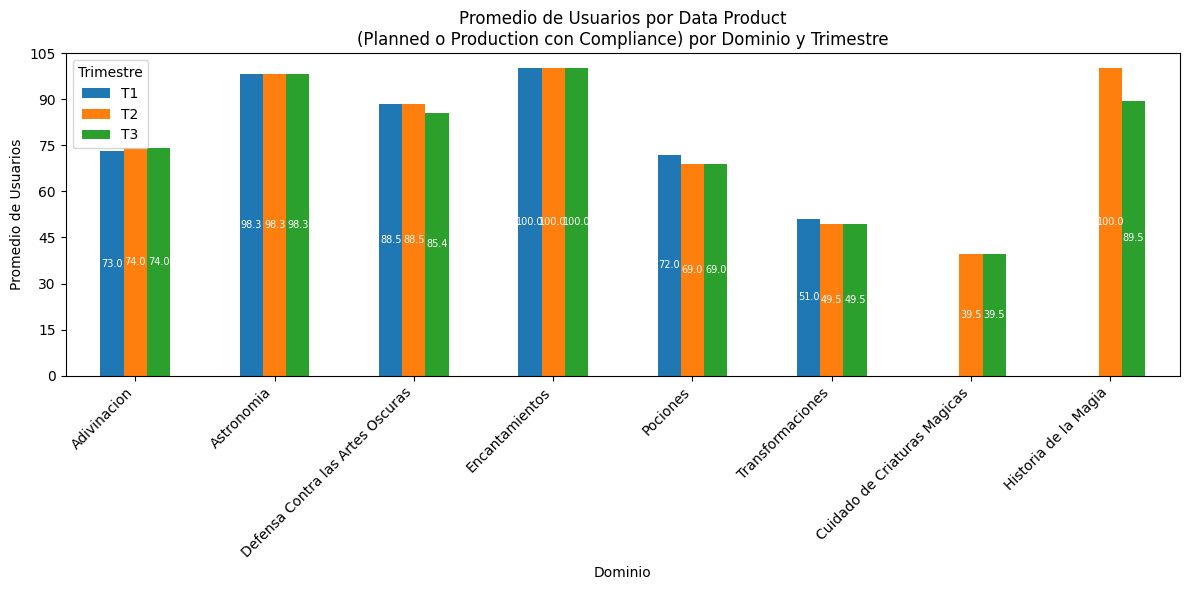

In [229]:
# Unificamos los promedios de usuarios por dominio y trimestre en un DataFrame
df_avg_users_domains = pd.concat(
    [
        avg_UPD_T1.rename('T1'),
        avg_UPD_T2.rename('T2'),
        avg_UPD_T3.rename('T3')
    ],
    axis=1
).fillna(0)

# Creamos la gráfica de barras agrupadas
plt.figure(figsize=(12, 6))
ax = df_avg_users_domains.plot(
    kind='bar',
    ax=plt.gca()
)

# Títulos y etiquetas
ax.set_title(
    'Promedio de Usuarios por Data Product\n(Planned o Production con Compliance) por Dominio y Trimestre',
    fontsize=12
)
ax.set_xlabel('Dominio')
ax.set_ylabel('Promedio de Usuarios')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks(rotation=45, ha='right')

# Añadimos los valores dentro de cada barra (con decimales)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(
            f'{height:.1f}',  # Valor con un decimal
            (p.get_x() + p.get_width() / 2., p.get_y() + height / 2.),
            ha='center',
            va='center',
            fontsize=7,
            color='white'
        )

plt.legend(title='Trimestre')
plt.tight_layout()
plt.show()

<h3 style="color:rgba(45, 187, 32, 1);">Usuarios en Data Products que no cumplen Compliance</h3>

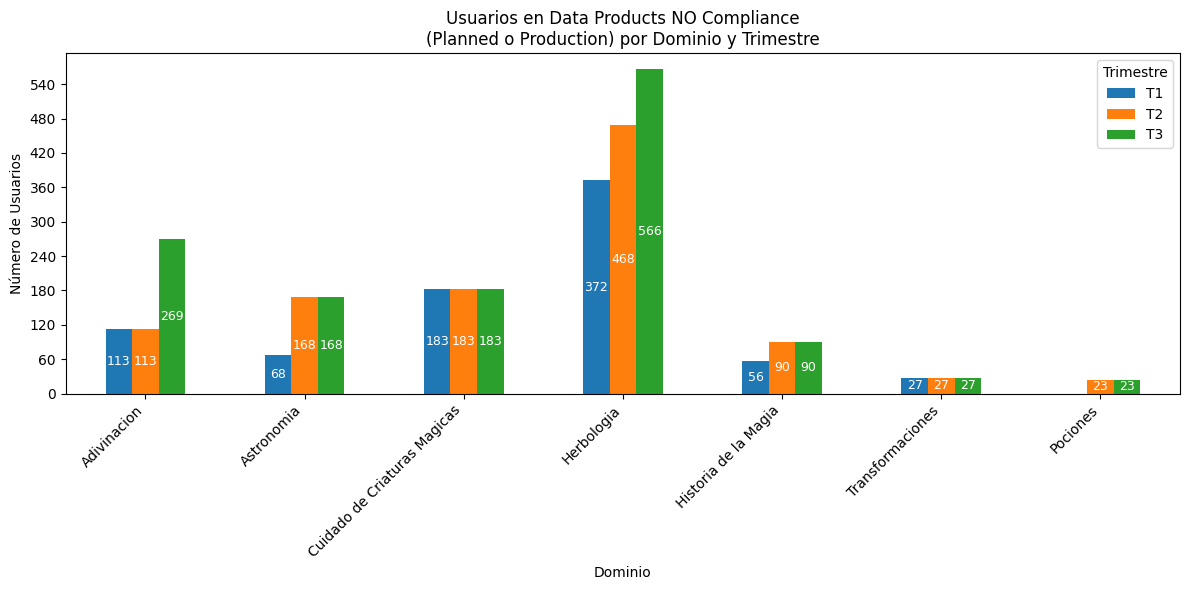

In [230]:
# Unificamos los usuarios NO compliant por dominio y trimestre en un DataFrame
df_users_no_compliance = pd.concat(
    [
        UPD_F_T1.rename('T1'),
        UPD_F_T2.rename('T2'),
        UPD_F_T3.rename('T3')
    ],
    axis=1
).fillna(0)

# Creamos la gráfica de barras agrupadas
plt.figure(figsize=(12, 6))
ax = df_users_no_compliance.plot(
    kind='bar',
    ax=plt.gca()
)

# Títulos y etiquetas
ax.set_title(
    'Usuarios en Data Products NO Compliance\n(Planned o Production) por Dominio y Trimestre',
    fontsize=12
)
ax.set_xlabel('Dominio')
ax.set_ylabel('Número de Usuarios')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks(rotation=45, ha='right')

# Añadimos los valores dentro de cada barra
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(
            f'{int(height)}',
            (p.get_x() + p.get_width() / 2., p.get_y() + height / 2.),
            ha='center',
            va='center',
            fontsize=9,
            color='white'
        )

plt.legend(title='Trimestre')
plt.tight_layout()
plt.show()

<h3 style="color:rgba(216, 213, 14, 1);">Data Products en estado "Deprecated" por dominio</h3>

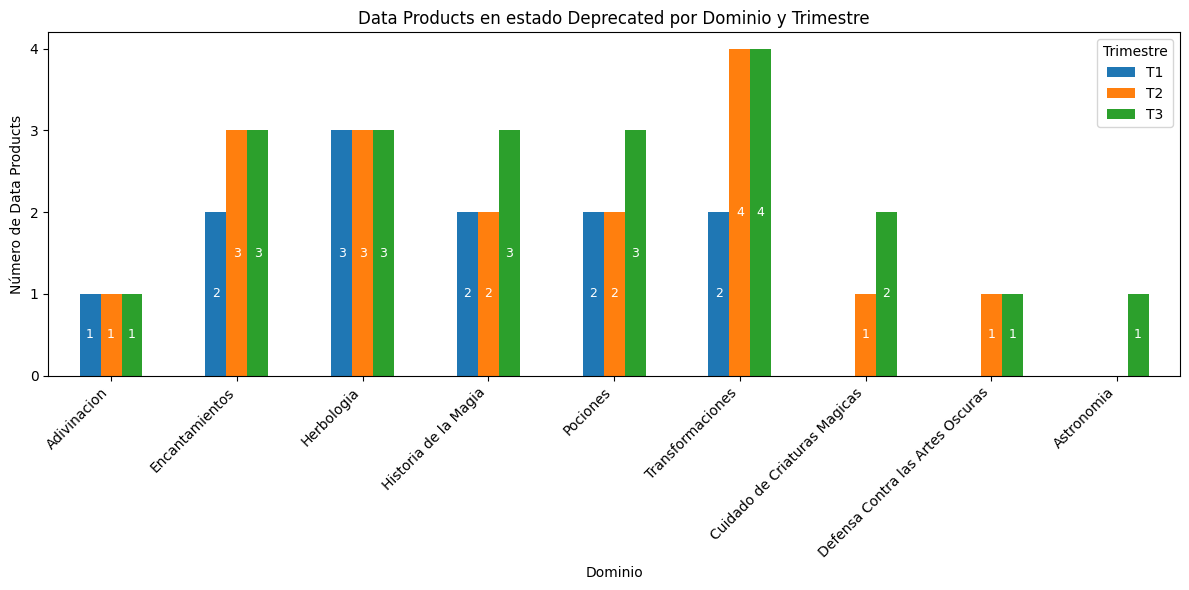

In [231]:
# Unificamos los Data Products Deprecated por dominio y trimestre en un DataFrame
df_deprecated_domains = pd.concat(
    [
        DPD_T1.rename('T1'),
        DPD_T2.rename('T2'),
        DPD_T3.rename('T3')
    ],
    axis=1
).fillna(0)

# Creamos la gráfica de barras agrupadas
plt.figure(figsize=(12, 6))
ax = df_deprecated_domains.plot(
    kind='bar',
    ax=plt.gca()
)

# Títulos y etiquetas
ax.set_title('Data Products en estado Deprecated por Dominio y Trimestre', fontsize=12)
ax.set_xlabel('Dominio')
ax.set_ylabel('Número de Data Products')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks(rotation=45, ha='right')

# Añadimos los valores dentro de cada barra
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(
            f'{int(height)}',
            (p.get_x() + p.get_width() / 2., p.get_y() + height / 2.),
            ha='center',
            va='center',
            fontsize=9,
            color='white'
        )

plt.legend(title='Trimestre')
plt.tight_layout()
plt.show()


<h3 style="color:rgba(216, 213, 14, 1);">Usuarios conectados a Data Products "Deprecated"</h3>

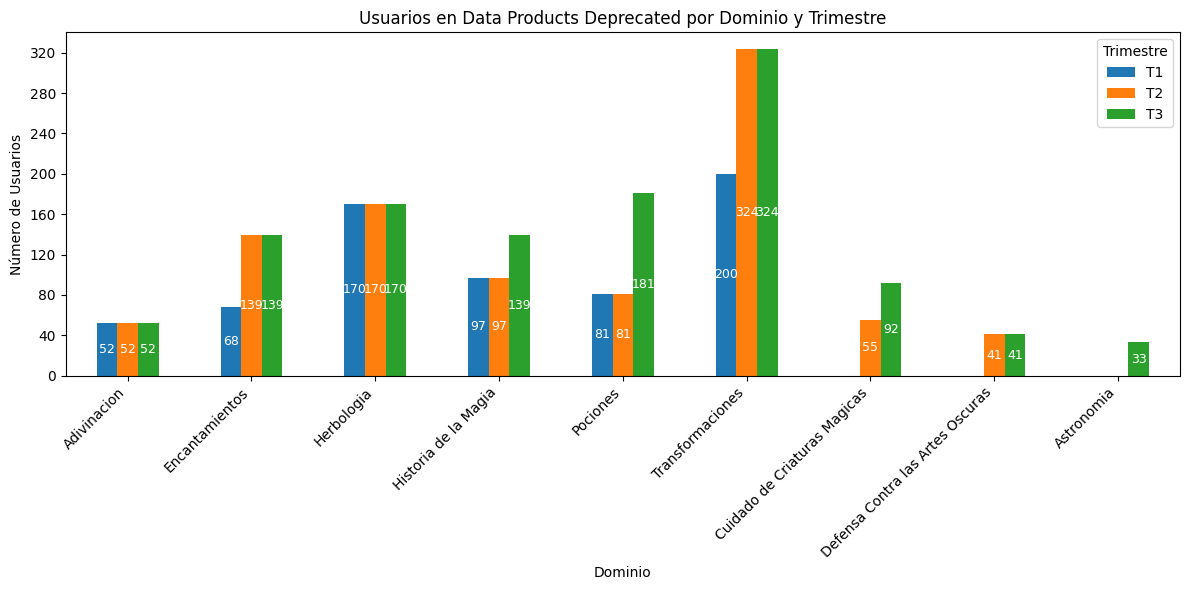

In [232]:
# Unificamos los usuarios en Data Products Deprecated por dominio y trimestre en un DataFrame
df_users_deprecated = pd.concat(
    [
        UPDD_T1.rename('T1'),
        UPDD_T2.rename('T2'),
        UPDD_T3.rename('T3')
    ],
    axis=1
).fillna(0)

# Creamos la gráfica de barras agrupadas
plt.figure(figsize=(12, 6))
ax = df_users_deprecated.plot(
    kind='bar',
    ax=plt.gca()
)

# Títulos y etiquetas
ax.set_title('Usuarios en Data Products Deprecated por Dominio y Trimestre', fontsize=12)
ax.set_xlabel('Dominio')
ax.set_ylabel('Número de Usuarios')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks(rotation=45, ha='right')

# Añadimos los valores dentro de cada barra
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(
            f'{int(height)}',
            (p.get_x() + p.get_width() / 2., p.get_y() + height / 2.),
            ha='center',
            va='center',
            fontsize=9,
            color='white'
        )

plt.legend(title='Trimestre')
plt.tight_layout()
plt.show()


<h3 style="color:rgba(216, 14, 14, 1);">Cantidad de funcionarios por trimestre</h3>

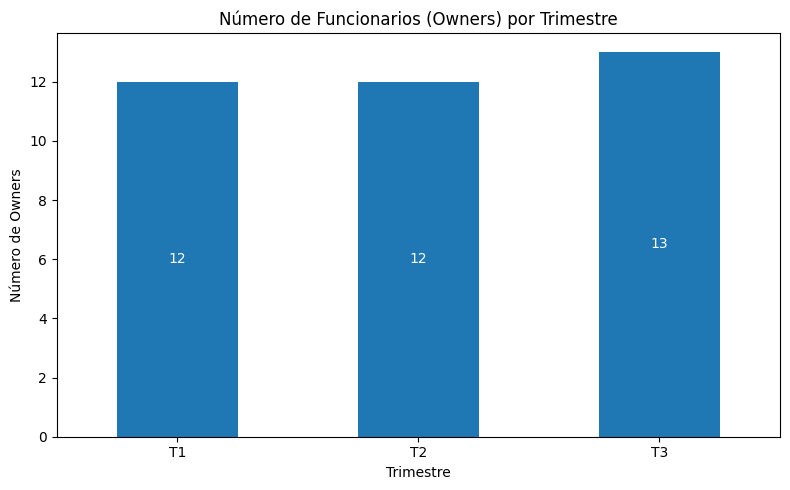

In [233]:
# -----------------------
# Gráfico 1: Número de funcionarios (Owners) por trimestre
# -----------------------
owners_count = {
    'T1': len(fun_T1),
    'T2': len(fun_T2),
    'T3': len(fun_T3)
}

df_owners_count = pd.DataFrame.from_dict(
    owners_count,
    orient='index',
    columns=['Número de Owners']
)

plt.figure(figsize=(8, 5))
ax1 = df_owners_count.plot(
    kind='bar',
    legend=False,
    ax=plt.gca()
)

ax1.set_title('Número de Funcionarios (Owners) por Trimestre', fontsize=12)
ax1.set_xlabel('Trimestre')
ax1.set_ylabel('Número de Owners')
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks(rotation=0)

for p in ax1.patches:
    height = p.get_height()
    if height > 0:
        ax1.annotate(
            f'{int(height)}',
            (p.get_x() + p.get_width() / 2., p.get_y() + height / 2.),
            ha='center',
            va='center',
            fontsize=10,
            color='white'
        )

plt.tight_layout()
plt.show()


<h3 style="color:rgba(216, 14, 14, 1);">Data Products por Owner y Estado por trimestre</h3>

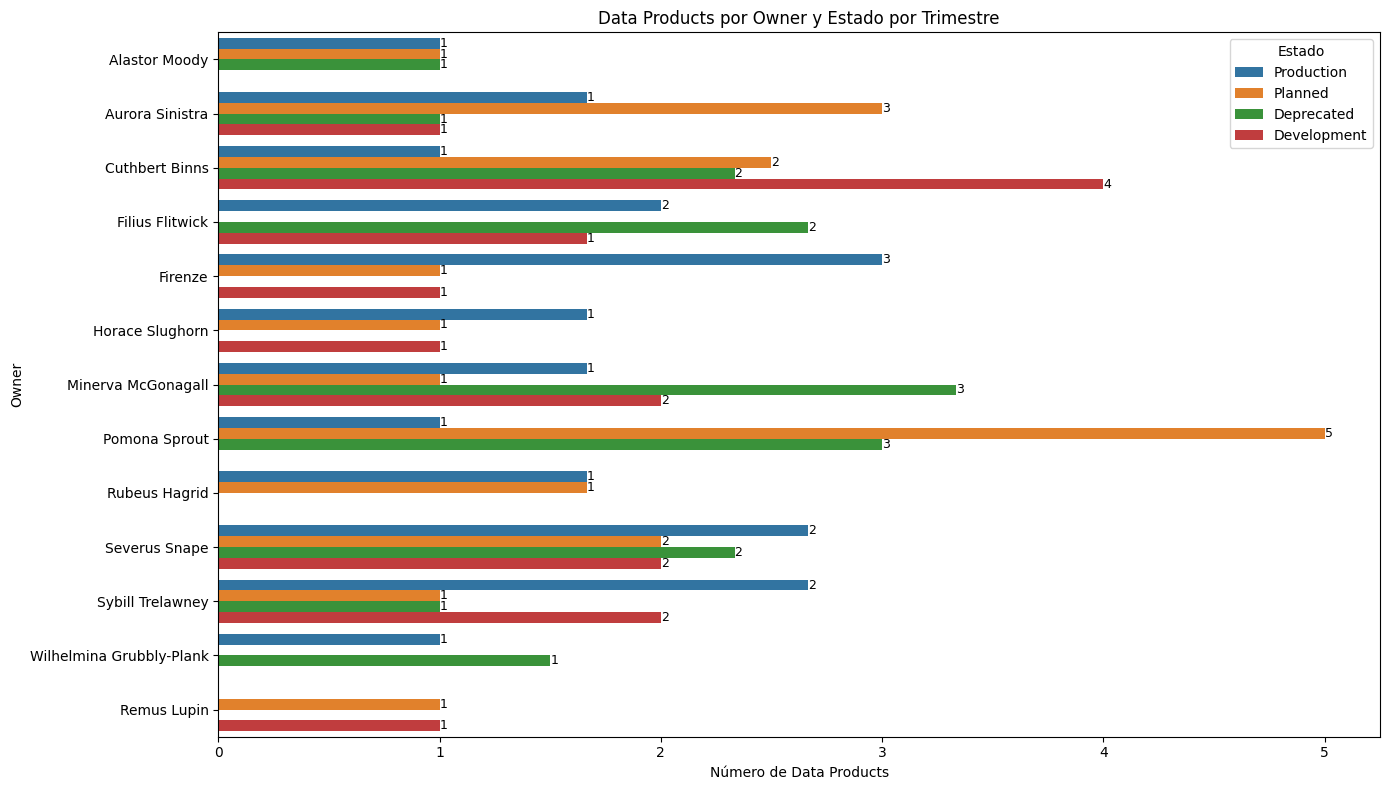

In [234]:
# -----------------------
# Gráfico 2: Data Products por Owner y Estado por trimestre
# -----------------------

# Preparamos los datos para cada trimestre
dp_status_owner_T1 = DPOE_T1.reset_index().rename(columns={0:'Count'})
dp_status_owner_T1['Trimestre'] = 'T1'

dp_status_owner_T2 = DPOE_T2.reset_index().rename(columns={0:'Count'})
dp_status_owner_T2['Trimestre'] = 'T2'

dp_status_owner_T3 = DPOE_T3.reset_index().rename(columns={0:'Count'})
dp_status_owner_T3['Trimestre'] = 'T3'

# Concatenamos los tres trimestres
df_dp_owner_all = pd.concat([dp_status_owner_T1, dp_status_owner_T2, dp_status_owner_T3], ignore_index=True)

# Creamos una gráfica de barras horizontales agrupadas por Owner y coloreadas por Estado
plt.figure(figsize=(14, 8))
ax2 = sns.barplot(
    data=df_dp_owner_all,
    x='Count',
    y='Owner',
    hue='Status',
    dodge=True,
    errorbar=None  # Evita el warning de ci
)

ax2.set_title('Data Products por Owner y Estado por Trimestre', fontsize=12)
ax2.set_xlabel('Número de Data Products')
ax2.set_ylabel('Owner')
plt.legend(title='Estado')

# Añadimos los valores dentro de las barras
for p in ax2.patches:
    width = p.get_width()
    if width > 0:
        ax2.annotate(
            f'{int(width)}',
            (p.get_width(), p.get_y() + p.get_height() / 2.),
            ha='left',
            va='center',
            fontsize=9,
            color='black'
        )

plt.tight_layout()
plt.show()

<h3 style="color:rgba(216, 14, 14, 1);">Top 3 Owners por número de usuarios en Planned/Production</h3>

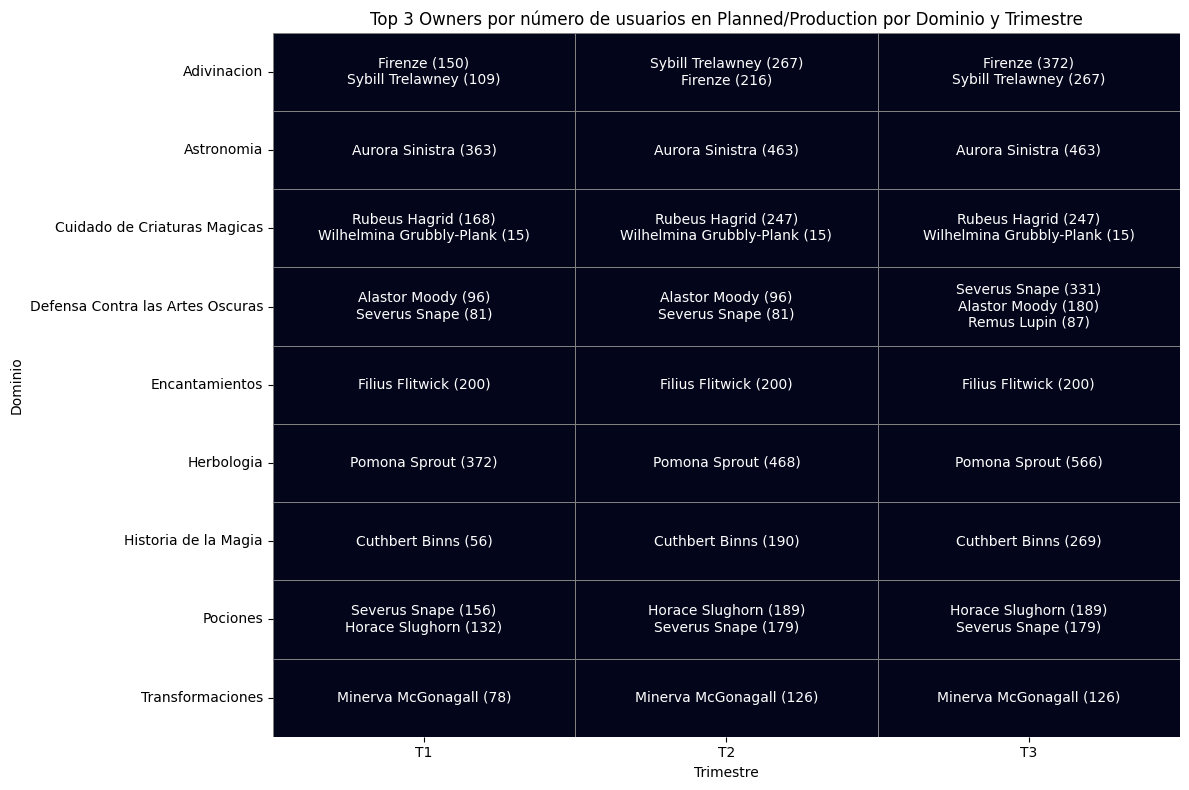

In [235]:
# Concatenamos los tres trimestres
top_own_PPD_T1['Trimestre'] = 'T1'
top_own_PPD_T2['Trimestre'] = 'T2'
top_own_PPD_T3['Trimestre'] = 'T3'
df_top_owners = pd.concat([top_own_PPD_T1, top_own_PPD_T2, top_own_PPD_T3], ignore_index=True)

# Creamos columna combinada "Owner (Usuarios)" y separamos cada Owner en una línea
df_top_owners['Owner_Usuarios'] = df_top_owners['Owner'] + ' (' + df_top_owners['NumberUsers'].astype(str) + ')'

# Pivotamos la tabla: filas = Dominio, columnas = Trimestre
df_table = df_top_owners.groupby(['Domain', 'Trimestre'])['Owner_Usuarios'].apply(lambda x: '\n'.join(x)).unstack()

# Visualizamos como un heatmap (dummy data) con textos multilínea
plt.figure(figsize=(12, 8))
sns.heatmap(
    np.zeros(df_table.shape),  # dummy data
    annot=df_table.values,     # anotaciones con multilínea
    fmt='',
    cbar=False,
    linewidths=.5,
    linecolor='gray',
    annot_kws={"size": 10}     # tamaño del texto
)

plt.title('Top 3 Owners por número de usuarios en Planned/Production por Dominio y Trimestre', fontsize=12)
plt.xlabel('Trimestre')
plt.ylabel('Dominio')
plt.xticks(ticks=np.arange(len(df_table.columns))+0.5, labels=df_table.columns)
plt.yticks(ticks=np.arange(len(df_table.index))+0.5, labels=df_table.index, rotation=0)
plt.tight_layout()
plt.show()

<h3 style="color:rgba(216, 14, 14, 1);">Owner menos productivo por dominio (Mayor % Deprecated)</h3>

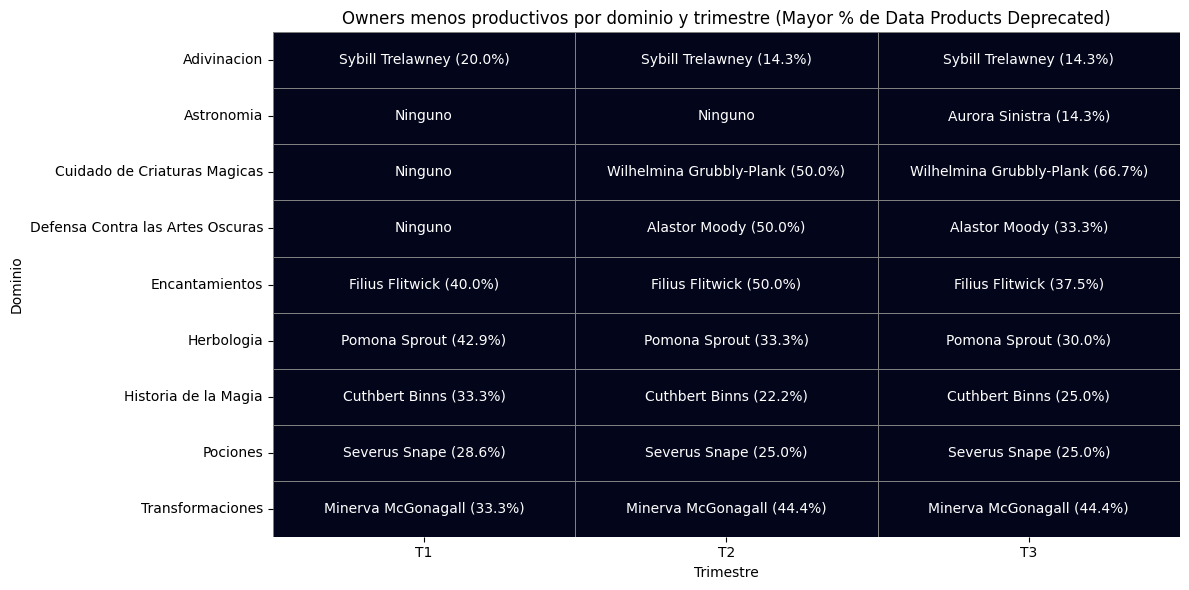

In [236]:
# Reemplazamos NaN por "Ninguno" en la tabla
df_table_bottom_filled = df_table_bottom.fillna("Ninguno")

# Visualizamos como un heatmap para mostrar los Owners menos productivos por dominio y trimestre
plt.figure(figsize=(12, 6))
sns.heatmap(
    np.zeros(df_table_bottom_filled.shape),  # dummy data
    annot=df_table_bottom_filled.values,     # anotaciones
    fmt='',
    cbar=False,
    linewidths=.5,
    linecolor='gray',
    annot_kws={"size": 10}
)

plt.title('Owners menos productivos por dominio y trimestre (Mayor % de Data Products Deprecated)', fontsize=12)
plt.xlabel('Trimestre')
plt.ylabel('Dominio')
plt.xticks(ticks=np.arange(len(df_table_bottom_filled.columns))+0.5, labels=df_table_bottom_filled.columns)
plt.yticks(ticks=np.arange(len(df_table_bottom_filled.index))+0.5, labels=df_table_bottom_filled.index, rotation=0)
plt.tight_layout()
plt.show()


<h3 style="color:rgba(216, 14, 14, 1);">Owners trabajando en múltiples dominios ("Mago Polifacético")</h3>

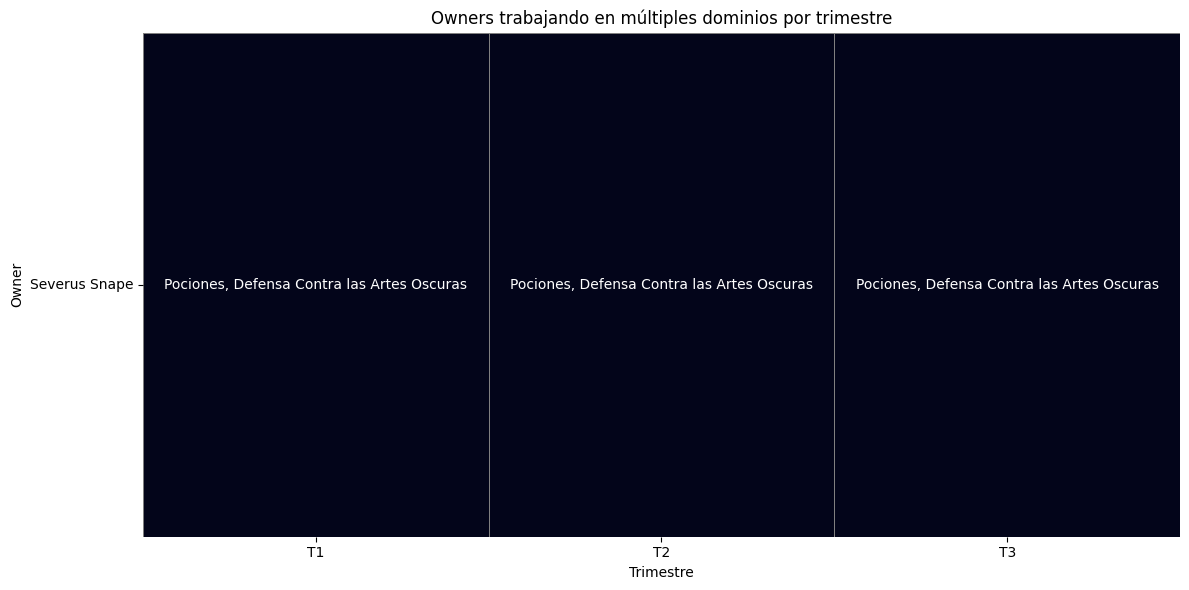

In [237]:
# Filtramos los owners que tienen más de un dominio y hacemos copia para evitar SettingWithCopyWarning
multi_domain_owners_T1 = Dif_DMO_T1[Dif_DMO_T1['DomainsCount'] > 1].copy()
multi_domain_owners_T2 = Dif_DMO_T2[Dif_DMO_T2['DomainsCount'] > 1].copy()
multi_domain_owners_T3 = Dif_DMO_T3[Dif_DMO_T3['DomainsCount'] > 1].copy()

# Añadimos la columna Trimestre usando .loc
multi_domain_owners_T1.loc[:, 'Trimestre'] = 'T1'
multi_domain_owners_T2.loc[:, 'Trimestre'] = 'T2'
multi_domain_owners_T3.loc[:, 'Trimestre'] = 'T3'

# Concatenamos los tres trimestres
df_multi_domain = pd.concat([multi_domain_owners_T1, multi_domain_owners_T2, multi_domain_owners_T3], ignore_index=True)

# Creamos columna combinada "Owner (Dominios)"
df_multi_domain['Owner_Domains'] = df_multi_domain['Owner'] + ' (' + df_multi_domain['DomainsCount'].astype(str) + ')'

# Pivotamos la tabla: filas = Owner, columnas = Trimestre, valores = lista de dominios
df_table_multi = df_multi_domain.groupby(['Owner', 'Trimestre'])['Domains'].apply(lambda x: ', '.join([str(d) for sub in x for d in sub])).unstack()

# Reemplazamos NaN por "Ninguno"
df_table_multi_filled = df_table_multi.fillna("Ninguno")

# Visualizamos como heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    np.zeros(df_table_multi_filled.shape),
    annot=df_table_multi_filled.values,
    fmt='',
    cbar=False,
    linewidths=.5,
    linecolor='gray',
    annot_kws={"size": 10}
)
plt.title('Owners trabajando en múltiples dominios por trimestre', fontsize=12)
plt.xlabel('Trimestre')
plt.ylabel('Owner')
plt.xticks(ticks=np.arange(len(df_table_multi_filled.columns))+0.5, labels=df_table_multi_filled.columns)
plt.yticks(ticks=np.arange(len(df_table_multi_filled.index))+0.5, labels=df_table_multi_filled.index, rotation=0)
plt.tight_layout()
plt.show()